In [4]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def apply_color_map(seg_mask):
    # Create an empty image with 3 channels (RGB)
    color_image = np.zeros((seg_mask.shape[0], seg_mask.shape[1], 3), dtype=np.uint8)

    # Define colors for each segment value (0: black, 1: red, 2: green, 3: blue)
    colors = {
        0: [0, 0, 0],  # black for background
        1: [255, 0, 0],  # red
        2: [0, 255, 0],  # green
        3: [0, 0, 255],  # blue
    }

    # Apply the colors to the image
    for val, color in colors.items():
        color_image[seg_mask == val] = color

    color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
    return color_image

(-0.5, 999.5, 1023.5, -0.5)

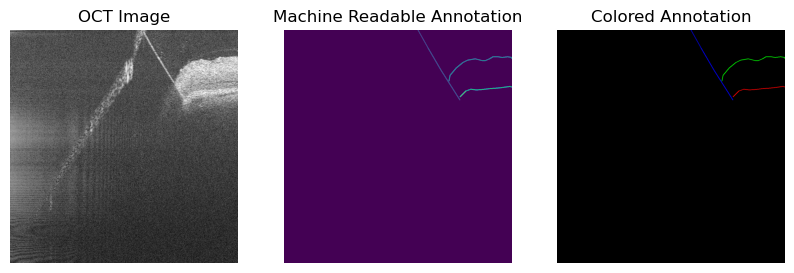

In [9]:
oct_img_path = "../data/jul9-4/img/volume_0_slice_1.jpg"
annotation_path = "../data/jul9-4/masks_machine/volume_0_slice_1.png"

oct_img = cv2.imread(oct_img_path)
annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)
colored_annotation = apply_color_map(annotation)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(oct_img, cmap="gray")
axes[0].set_title("OCT Image")
axes[0].axis("off")

axes[1].imshow(annotation, cmap="gray")
axes[1].set_title("Annotation")
axes[1].axis("off")

axes[2].imshow(colored_annotation)
axes[2].set_title("Colored Annotation")
axes[2].axis("off")
